In [1]:
from configuration import *

Using TensorFlow backend.


In [3]:
# -- set up the gpu env
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# -- instantiate vae object
vae = VAIM()

# -- other avilable examples 'sin'
vae.example = 'x2'

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 1)            0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 1024)         2048        encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu_14 (LeakyReLU)      (None, 1024)         0           dense_15[0][0]                   
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 1024)         1049600     leaky_re_lu_14[0][0]             
__________________________________________________________________________________________________
leaky_re_l

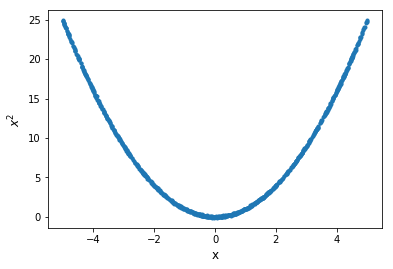

In [4]:
if (vae.example == 'sin'):
    x,y = generate_sin_samples(N = 10000, domain = 4)
    plot_sin(x[0:1000], y[0:1000])

elif (vae.example == 'x2'):
    x,y = generate_x2_samples(N = 10000, noise = 0.05, domain = 5)
    plot_x2(x[0:1000],y[0:1000])

else:
    print('wrong model .... ')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)   
history = vae.train(X_train, y_train)

In [6]:
# -- load mode with lowest validation error
vae.model.load_weights(vae.DIR + vae.model_name)

In [14]:
print('plot loss')
plot_loss(history)

In [8]:
# -- predict using test samples
result = vae.predict(vae, X_train, y_test)

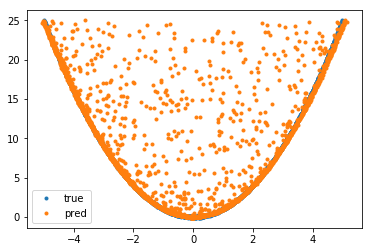

In [9]:
# -- plot the results
plot_result(result[0], X_test, y_test)

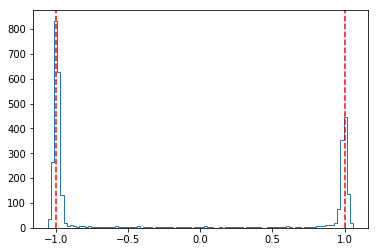

In [10]:
# -- predict using one number e.g y = 1
zero = np.ones(y_test.shape[0])
result = vae.predict(vae, X_train, zero)

plt.hist(result[0], histtype='step', bins = 100)
plt.axvline(x = -1, linestyle = 'dashed', color = 'red')
plt.axvline(x =  1, linestyle = 'dashed', color = 'red')
plt.show()

In [11]:
Z = vae.get_latent(X_train)

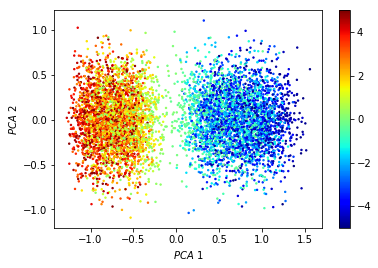

In [13]:
plot_latent(Z, X_train)